In [1]:
from sympy import *
from sympy.physics.mechanics import *
from IPython.display import display
import util
import math
init_printing()

In [2]:
h, r, pi = symbols("h r π")
q = r / h


func_a = (2-q)**3 - 4*(1-q)**3
func_b = (2-q)**3
func = Piecewise(
    (func_a, q <= 1),
    (func_b, q <= 2),
    (0, True)
)

volume = integrate(4*pi*r**2*func_a, (r, 0, h)) + integrate(4*pi*r**2*func_b, (r, h, 2*h))

simplify(volume)

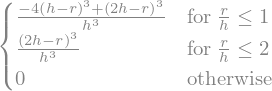

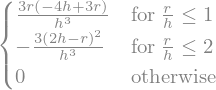

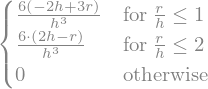

In [3]:
function, gradient, laplacian = util.get_derivatives(func, r)
display(function, gradient, laplacian)

In [4]:
test_h = 0.5
upper_bound = 2*test_h

s = [(h, test_h), (pi, math.pi), (r, abs(r))]
f = (func/volume).subs(s)
g = (gradient/volume).subs(s)
l = (laplacian/volume).subs(s)

util.sampling(f, g, l, r, upper_bound, test_h, "samples/cubic_spline.json")

{'h_value': 0.5,
 'function': [(0.0, 2.5464790894703255),
  (0.1, 2.408969218638928),
  (0.2, 2.0575551042920237),
  (0.30000000000000004, 1.583909993650542),
  (0.4, 1.0797071339354178),
  (0.5, 0.6366197723675814),
  (0.6000000000000001, 0.32594932345220146),
  (0.7000000000000001, 0.13750987083139748),
  (0.8, 0.04074366543152518),
  (0.9, 0.005092958178940648)],
 'gradient': [(0.0, 0.0),
  (0.1, -2.597408671259732),
  (0.2, -4.278084870310146),
  (0.30000000000000004, -5.042028597151245),
  (0.4, -4.8892398517830244),
  (0.5, -3.819718634205488),
  (0.6000000000000001, -2.4446199258915113),
  (0.7000000000000001, -1.375098708313975),
  (0.8, -0.6111549814728778),
  (0.9, -0.15278874536821946)],
 'laplacian': [(0.0, -30.557749073643905),
  (0.1, -21.390424351550735),
  (0.2, -12.223099629457563),
  (0.30000000000000004, -3.055774907364389),
  (0.4, 6.111549814728782),
  (0.5, 15.278874536821952),
  (0.6000000000000001, 12.22309962945756),
  (0.7000000000000001, 9.167324722093172),
 

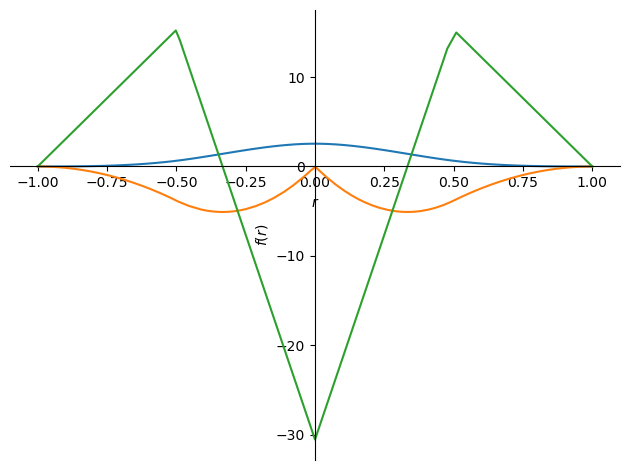

In [5]:
plot(f,g,l, (r, -upper_bound, upper_bound))
